In [83]:
from contextlib import closing
import io
import numpy
from copy import deepcopy
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [84]:
# ---------- Prepare data section ---------- #
# load mnist dataset
# x_train, y_train - training dataset and validation vector
# x_test, y_test - validation dataset and validation vector
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# make a deep copy to render data
render_x = deepcopy(x_train)
render_y = deepcopy(y_train)

# declare num of training samples
num_labels = len(numpy.unique(y_train))

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# convert a single list to categorical list of lists
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
x_train = numpy.reshape(x_train, [-1, input_size]) # [-1, 784]
x_train = x_train.astype('float32') / 255
x_test = numpy.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

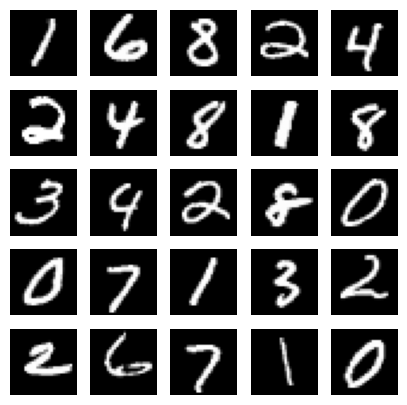

In [85]:
# ----------- Show sample section ---------- #
indexes = numpy.random.randint(0, render_x.shape[0], size=25)
images = render_x[indexes]
labels = render_y[indexes]
# plot the 25 mnist digits
pyplot.figure(figsize=(5,5))
for i in range(len(indexes)):
    pyplot.subplot(5, 5, i + 1)
    image = images[i]
    pyplot.imshow(image, cmap='gray')
    pyplot.axis('off')
pyplot.savefig("1_mpl_mnist-samples.png")
pyplot.show()
pyplot.close('all')

In [86]:
# network parameters
BATCH_SIZE = 64
HIDDEN_UNITS = 256
DROPOUT = 0.45

def build_model(units=HIDDEN_UNITS, dropout=DROPOUT, input_size=input_size, num_labels=num_labels):
    # model is a 3-layer MLP with ReLU and dropout after each layer
    model = Sequential()
    model.add(Dense(units, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_labels))
    # this is the output for one-hot vector
    model.add(Activation('softmax'))
    return model

model = build_model()

# close file handler at the end of context execution
with closing(io.StringIO()) as fh:
    model.summary(print_fn=lambda x: fh.write(x + "\n"))
    summary_str = fh.getvalue()

# set up image representation
pyplot.figure(figsize=(12, 6))
pyplot.text(0, 1, summary_str, fontsize=12, family='monospace', va='top')
pyplot.axis('off')

# save as PNG
pyplot.savefig('1_mpl_mnist-model-summary.png', bbox_inches='tight')
pyplot.close()

In [87]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=BATCH_SIZE)
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7998 - loss: 0.6314
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9428 - loss: 0.1904
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9571 - loss: 0.1433
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9611 - loss: 0.1266
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9652 - loss: 0.1115
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9680 - loss: 0.1007
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9720 - loss: 0.0951
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9725 - loss: 0.0879
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9743 - loss: 0.0807
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9745 - loss: 0.0838
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9755 - loss: 0.0755
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

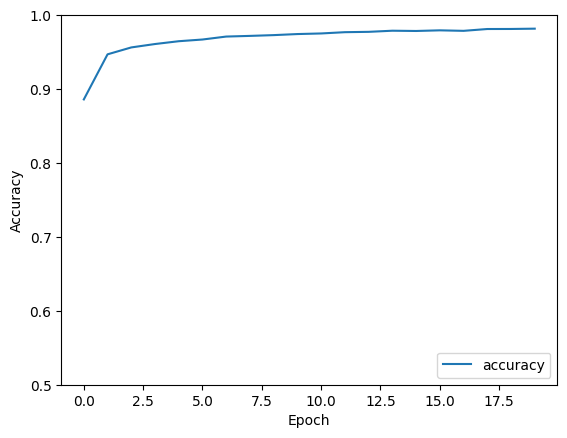

313/313 - 0s - 835us/step - accuracy: 0.9807 - loss: 0.0733
Final model accuracy: 98.070%


In [88]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.ylim([0.5, 1])
pyplot.legend(loc='lower right')
pyplot.savefig("1_mpl_mnist-accuracy-history.png")
pyplot.show()
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Final model accuracy: {test_acc*100:.3f}%", )


In [89]:
model.save('1_mpl_mnist-model.keras')